## Logistic Regression Project

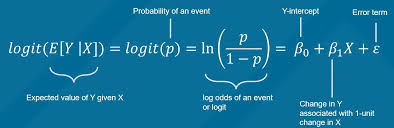

In [37]:
from IPython.display import Image, display
display(Image(filename="D:\Download\images.jpg"))  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
ad =pd.read_csv('advertising.csv')

In [3]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


## Exploratory Data Analysis

In [6]:
sns.set_style('whitegrid')

Text(0.5, 0, 'Age')

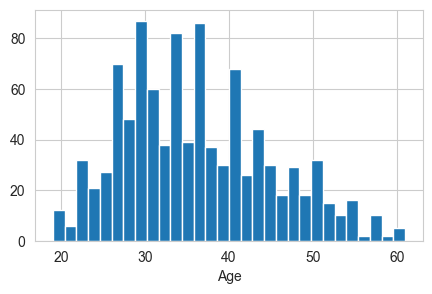

In [7]:
ad['Age'].hist(bins=30,grid=True,figsize=(5,3))
plt.xlabel('Age')


**Create a jointplot showing Area Income versus Age.**

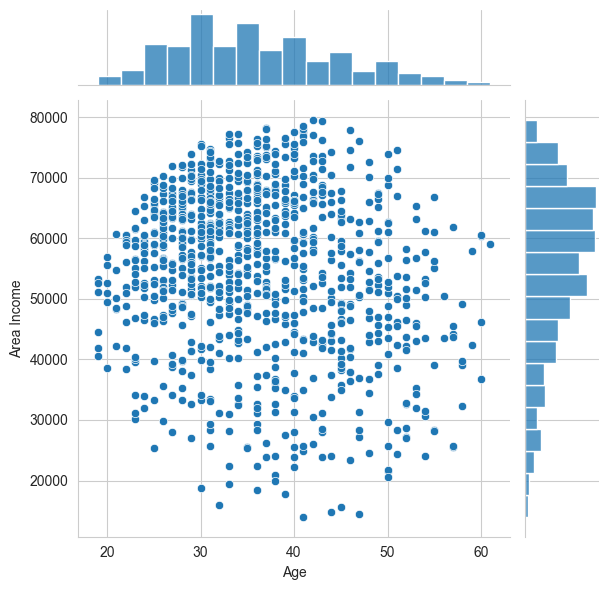

In [8]:
sns.jointplot(data=ad,x='Age',y= 'Area Income')

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

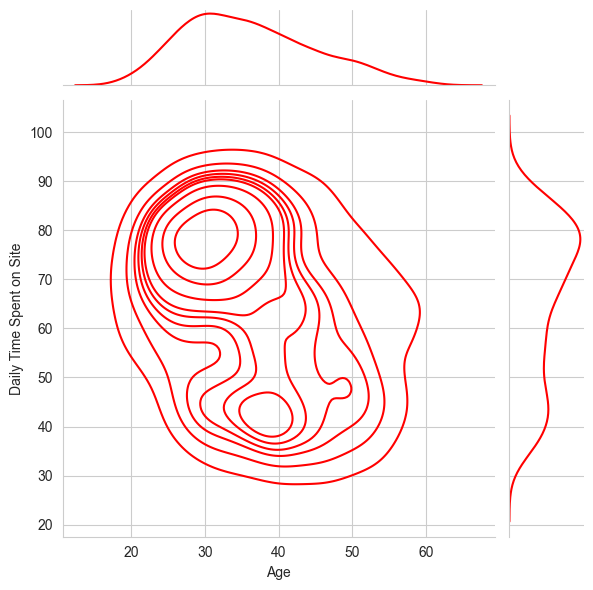

In [9]:
sns.jointplot(data=ad,x='Age',y='Daily Time Spent on Site',kind='kde',color='red')

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

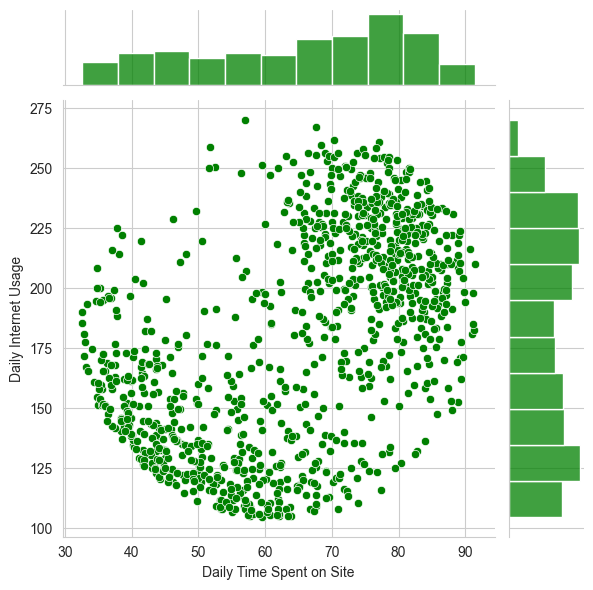

In [10]:
sns.jointplot(data=ad,x='Daily Time Spent on Site',y= 'Daily Internet Usage',color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

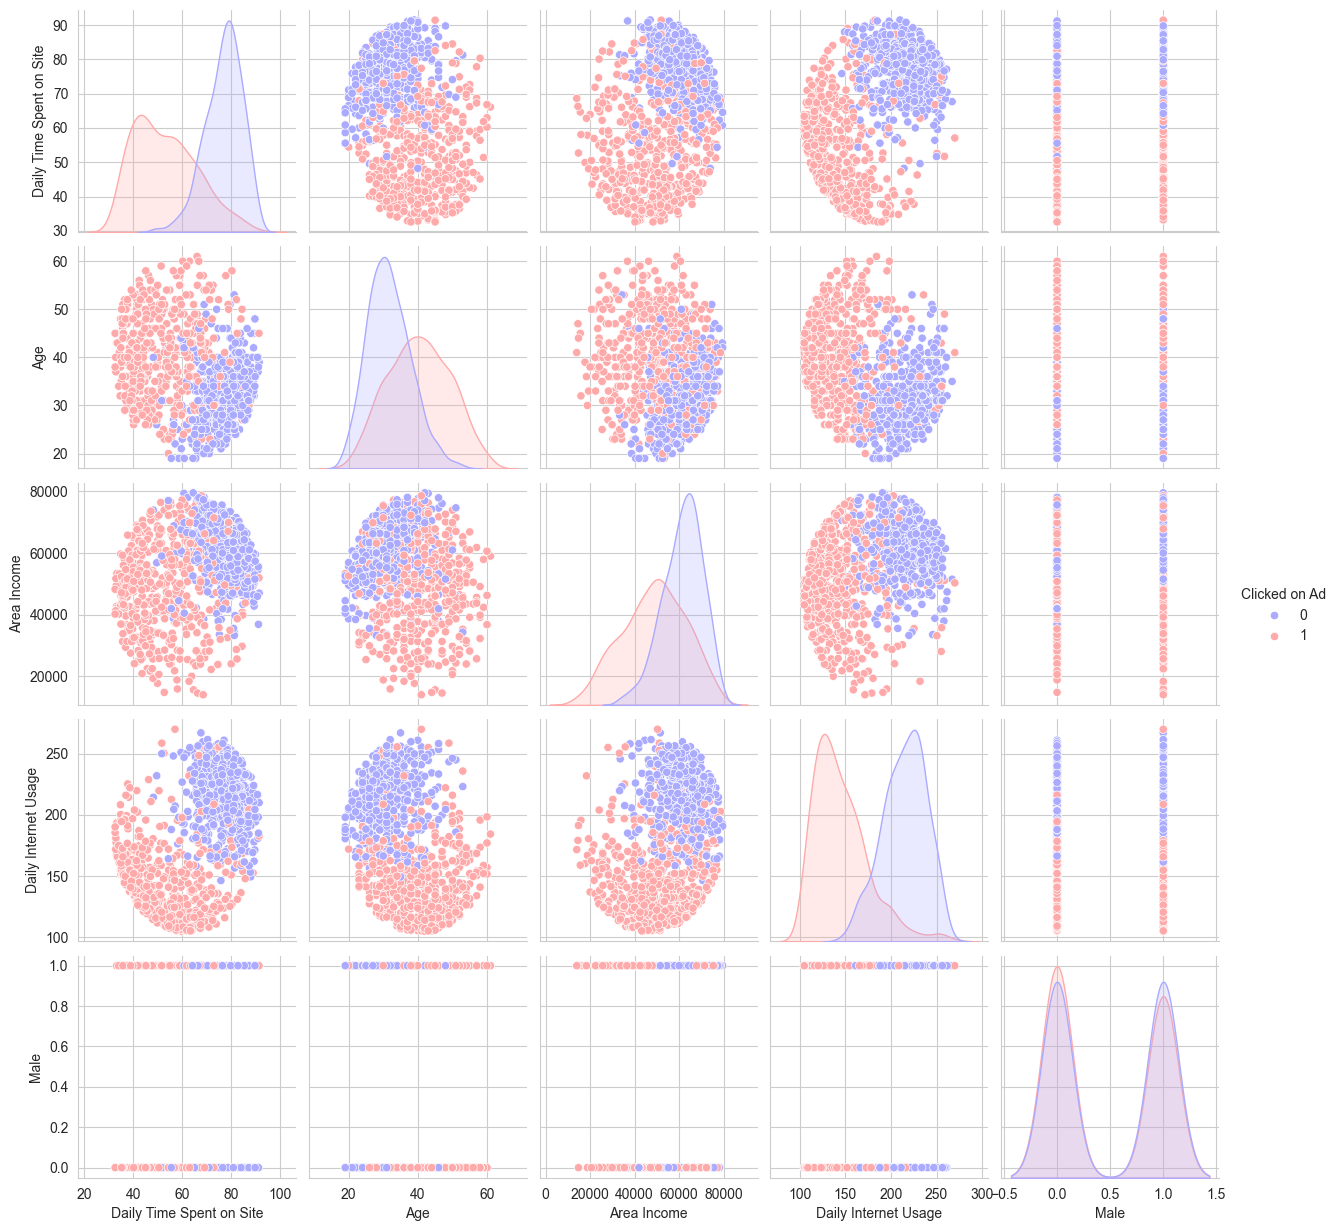

In [11]:
sns.pairplot(ad,hue= 'Clicked on Ad',palette='bwr')

## data clining

In [12]:
# Drop unnecessary columns
ad = ad.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1)

In [13]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Male                      1000 non-null   int64  
 5   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [14]:
# Convert specific float columns to integers
ad['Daily Time Spent on Site'] = ad['Daily Time Spent on Site'].astype(int)
ad['Area Income'] = ad['Area Income'].astype(int)
ad['Daily Internet Usage'] = ad['Daily Internet Usage'].astype(int)


In [15]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68,35,61833,256,0,0
1,80,31,68441,193,1,0
2,69,26,59785,236,0,0
3,74,29,54806,245,1,0
4,68,35,73889,225,0,0


# Logistic Regression

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X =ad.drop('Clicked on Ad',axis=1)
y = ad['Clicked on Ad']

In [18]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [19]:
X_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
290,50,31,72270,171,0
167,86,31,53767,219,1
486,83,40,66291,158,1
683,76,28,67990,192,0
876,67,44,51257,107,0


** Train and fit a logistic regression model on the training set.**

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)


In [22]:
model.fit(X_test,y_test)

LogisticRegression(max_iter=1000)

## Predictions and Evaluations

In [23]:
pridiction = model.predict(X_test)

** Create a classification report for the model.**

In [24]:
from sklearn.metrics import classification_report

In [25]:
print(classification_report(y_test,pridiction,zero_division=0))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
print(confusion_matrix(y_test,pridiction)) 

[[155   2]
 [  5 138]]


## Thank You